# <u> Death Prediction by Heart Failure</u>
<u> By: Christopher Smith https://github.com/CWSmith022/Learning.git</u>

The published data is from: <u> Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). </u>

The .csv file was obtained from: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


Heart disease is the leading cause of death for people in the United States. The development of models for prediction for potential of heart disease related death could be important for saving lives. Here, an approach using tools in the sci-kit learn library will be used for prediction of deaths by heart attacks. The process starts by feature selection with the KBestFunction by $Chi^{2}$ score, then the data is preprocessed to be used for several supervised Machine Learning Algorithms.

The Algorithms used are:

- Logistic Regression
- Support Vector Machines
- K-Nearest Neighbors
- Random Forest
- Gradient Boosting
- Ridge Classifier

## <u> Logistic Regression </u> 
A model that is used statistically for binary dependent variables based on the probability of an event occuring. This can be further extended for several variables in a classification setting for multi-class prediction.
    
## <u> Support Vector Machines (SVM) </u>
Commonly used for classification tasks, SVM's function by a Kernel which draws points on a hyperplane and uses a set of vectors to separate data points. This separation of data points creates a decision boundary for where a new data point can be predicted for a specific class label. 

## <u> K-Nearest Neighbors </u>
Simply, an algorithm that clusters the data and by a measure of distance to the 'k' nearest points votes for a specific class prediction.

## <u> Random Forest </u> 
An ensemble method that estimates several weak decision trees and combines the mean to create an uncorrelated forest at the end. The uncorrelated forest should be able to predict more accurately than an individual tree.

## <u> Gradient Boosting </u>
Similar to Random Forest, Gradient Boosting builds trees one at a time then ensembles them as each one is built.

## <u> Ridge Classifier </u>
Normalizes data then treats problem as a multi-output regression task.

## Table of Contents

[1.Importing Libraries](#1) <br/>
[2.Importing Data](#2) <br/>
[3.Exploring Data](#3) <br/>
[4.Feature Selection](#3) <br/>
[5.Splitting the Data](#4) <br/>
[6.Feature Scaling (Normalization)](#5) <br/>
[7.Machine Learning](#6) <br/>
    [7.1.Logistic Regression](#7.1) <br/>
    [7.2.Support Vector Machine](#7.2) <br/>
    [7.3.K-Nearest Neighbor](#7.3) <br/>
    [7.4.Random Forest](#7.4) <br/>
    [7.5.Gradient Boosting](#7.5) <br/>
    [7.6.Ridge Classifier](#7.6) <br/>
[8.Evaluation of Acuracy](#9) <br/>
[9.Discussion](#10) <br/>


<a id="1"></a>
## Importing Libraries

In [1]:
#Simple Data processing
import numpy as np #linear algebra
import pandas as pd # data processing, .csv load

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import itertools #For Confusion Matrix
%matplotlib inline
import seaborn as sns

# Scaling
from sklearn import preprocessing #For data normalization

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # For parameterization and splitting data
from sklearn.metrics import confusion_matrix
from sklearn import metrics # For Accuracy

#Classification Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier

<a id="2"></a>
# Importing Data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [3]:
heart=pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<a id="3"></a>
# Exploring Data

In [4]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
print(heart.columns.unique)

<bound method Index.unique of Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')>


<a id="4"></a>
# Feature Selection

In [7]:
#Separating the data to asses with feature selection 
X_feat=heart[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y_feat=heart['DEATH_EVENT']

In [8]:
#Feature Selection
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_feat,y_feat)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_feat.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Factors','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

                     Factors         Score
6                  platelets  26135.771990
11                      time   3826.892661
2   creatinine_phosphokinase   1897.314839
4          ejection_fraction     79.072541
0                        age     44.619455


By using KBest selection with the $Chi^{2}$ scorer that the top 5 Factors that could be related to 'DEATH_EVENT' are shown above and these will be used here on out for prediction of 'DEATH_EVENT'.

<a id="5"></a>
# Splitting The Data

In [9]:
train_accuracy= []
accuracy_list = []
algorithm = []

X_train,X_test,y_train,y_test = train_test_split(heart[['platelets','time','creatinine_phosphokinase','ejection_fraction','age']]
                                                 ,heart['DEATH_EVENT'],test_size=0.2, random_state=0)
print("X_train shape :",X_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",y_test.shape)

X_train shape : (239, 5)
Y_train shape : (239,)
X_test shape : (60, 5)
Y_test shape : (60,)


<a id="6"></a>
# Feature Scaling (Normalization)
To remove outlier bias the formula $z=(x-u)/s$ is used first on the training set then applied to the testing set

In [10]:
scaler_ss=preprocessing.StandardScaler()

In [11]:
X_train_scaled=scaler_ss.fit_transform(X_train)
X_test_scaled=scaler_ss.transform(X_test)

# Confusion Matrix

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.BuGn):

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<a id="7"></a>
# Machine Learning
<b>Alive is representative of (0) while Death is (1)  </b>

<a id="7.1"></a>
## Logistic Regression

Train Accuracy 0.795
Test Accuracy0.767
[[32  5]
 [ 9 14]]


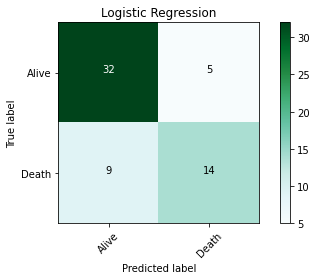

In [13]:
Log_Reg=LogisticRegression(C=1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Log_Reg.fit(X_train_scaled, y_train)
y_reg=Log_Reg.predict(X_test_scaled)
print("Train Accuracy {0:.3f}".format(Log_Reg.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_reg)))
cm = metrics.confusion_matrix(y_test, y_reg)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Alive', 'Death'],
                          title='Logistic Regression')
accuracy_list.append(metrics.accuracy_score(y_test, y_reg)*100)
train_accuracy.append(Log_Reg.score(X_train_scaled, y_train))
algorithm.append('Logistic Regression')

<a id="7.2"></a>
## Support Vector Machine
By using GRIDSearchCV the best kernel will be decided for the model.

The best parameters are  {'C': 1, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 0}
Train Accuracy 0.883
Test Accuracy0.767
[[36  1]
 [13 10]]


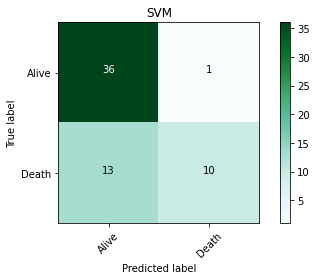

In [14]:
SVC_param={'kernel':['sigmoid','rbf','poly'],'C':[1],'decision_function_shape':['ovr'],'random_state':[0]}
SVC_pol=SVC()
SVC_parm=GridSearchCV(SVC_pol, SVC_param, cv=5)
SVC_parm.fit(X_train_scaled, y_train)
y_pol=SVC_parm.predict(X_test_scaled)
print("The best parameters are ",SVC_parm.best_params_)
print("Train Accuracy {0:.3f}".format(SVC_parm.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_pol)))
cm = metrics.confusion_matrix(y_test, y_pol)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Alive', 'Death'],
                          title='SVM')
train_accuracy.append(SVC_parm.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_pol)*100)
algorithm.append('SVM')

<a id="7.3"></a>
## K-Nearest Neighbor
First we need to select the best value of K for the highest accuracy in the model.

In [15]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    K_NN =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=i, p=2,
                     weights='distance')
    K_NN.fit(X_train_scaled, y_train)
    pred_i = K_NN.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

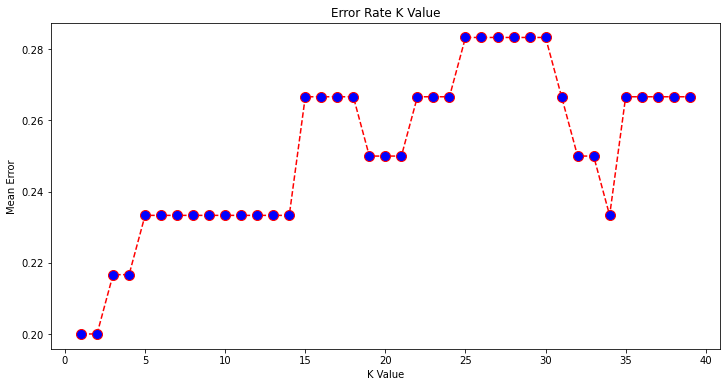

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Looking at the error helps decide the best K-Value given the parameters. The lower the error at K the better accuracy there will be.

Train Accuracy 1.000
Test Accuracy0.800
[[35  2]
 [10 13]]


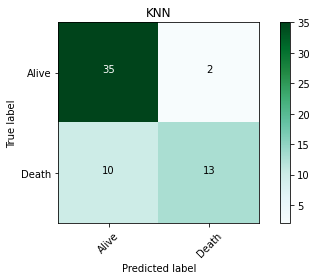

In [17]:
K_NN =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')
K_NN.fit(X_train_scaled, y_train)
y_KNN=K_NN.predict(X_test_scaled)
print("Train Accuracy {0:.3f}".format(K_NN.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_KNN)))
cm = metrics.confusion_matrix(y_test, y_KNN)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Alive', 'Death'],
                          title='KNN')
train_accuracy.append(K_NN.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_KNN)*100)
algorithm.append('KNN')

<a id="7.4"></a>
## Random Forest
By using GRIDSearchCV the best parameters will be decided for the model.

The best parameters are  {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.5, 'n_estimators': 100, 'random_state': None}
Train Accuracy 0.870
Test Accuracy0.833
[[36  1]
 [ 9 14]]


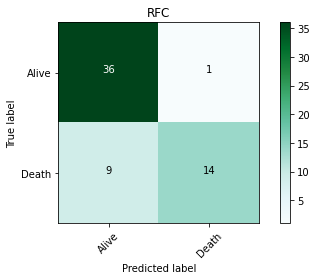

In [18]:
RFC_param={'max_depth':[1,2,3,4,5],'n_estimators':[10,25,50,100,150],'random_state':[None],
           'criterion':['entropy','gini'],'max_features':[0.5]}
RFC=RandomForestClassifier()
RFC_parm=GridSearchCV(RFC, RFC_param, cv=5)
RFC_parm.fit(X_train_scaled, y_train)
y_RFC=RFC_parm.predict(X_test_scaled)
print("The best parameters are ",RFC_parm.best_params_)
print("Train Accuracy {0:.3f}".format(RFC_parm.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_RFC)))
cm = metrics.confusion_matrix(y_test, y_RFC)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Alive', 'Death'],
                          title='RFC')
train_accuracy.append(RFC_parm.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_RFC)*100)
algorithm.append('Random Forest')

<a id="7.5"></a>
## Gradient Boosting Classifier
By using GRIDSearchCV the best parameters will be decided for the model.

The best parameters are  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'max_features': None, 'n_estimators': 50, 'random_state': None}
Train Accuracy 0.862
Test Accuracy0.833
[[36  1]
 [ 9 14]]


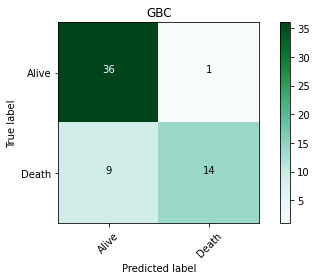

In [19]:
GBC_parma={'loss':['deviance','exponential'],'n_estimators':[10,25,50,100,150],'learning_rate':[0.1,0.25, 0.5, 0.75],
          'criterion':['friedman_mse'], 'max_features':[None],'max_depth':[1,2,3,4,5,10],'random_state':[None]}
GBC = GradientBoostingClassifier()
GBC_parm=GridSearchCV(GBC, GBC_parma, cv=5)
GBC_parm.fit(X_train_scaled, y_train)
y_GBC=GBC_parm.predict(X_test_scaled)
print("The best parameters are ",GBC_parm.best_params_)
print("Train Accuracy {0:.3f}".format(GBC_parm.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_GBC)))
cm = metrics.confusion_matrix(y_test, y_GBC)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Alive', 'Death'],
                          title='GBC')
train_accuracy.append(GBC_parm.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_GBC)*100)
algorithm.append('GBC')

<a id="7.6"></a>
## Ridge Classifier
By using GRIDSearchCV the best parameters will be decided for the model.

The best parameters are  {'alpha': 0, 'normalize': True, 'solver': 'svd'}
Train Accuracy 0.858
Test Accuracy0.750
[[35  2]
 [13 10]]


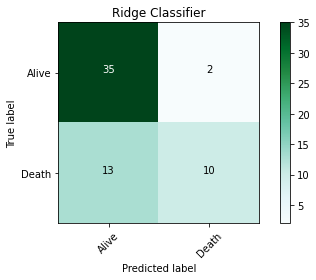

In [20]:
RC_parma={'solver':['svd','lsqr','cholesky'],'alpha':[0,0.5,0.75,1,1.5,2],'normalize':[True,False]}
RC=RidgeClassifier()
RC_parm=GridSearchCV(RC, RC_parma, cv=5)
RC_parm.fit(X_train_scaled, y_train)
y_RC=RC_parm.predict(X_test_scaled)
print("The best parameters are ",RC_parm.best_params_)
print("Train Accuracy {0:.3f}".format(RC_parm.score(X_train_scaled, y_train)))
print('Test Accuracy' "{0:.3f}".format(metrics.accuracy_score(y_test, y_RC)))
cm = metrics.confusion_matrix(y_test, y_RC)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['Alive', 'Death'],
                          title='Ridge Classifier')
train_accuracy.append(RC_parm.score(X_train_scaled, y_train))
accuracy_list.append(metrics.accuracy_score(y_test, y_RC)*100)
algorithm.append('Ridge Classifier')

<a id="9"></a>
# Evaluation of Accuracy

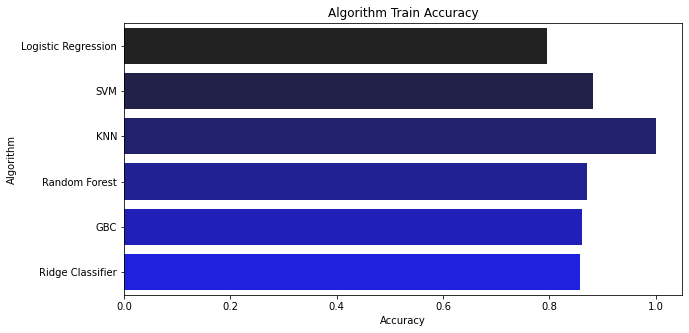

In [21]:
#Train Accuracy
f,ax = plt.subplots(figsize = (10,5))
sns.barplot(x=train_accuracy,y=algorithm,palette = sns.dark_palette("blue",len(accuracy_list)))
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
plt.title('Algorithm Train Accuracy')
plt.show()

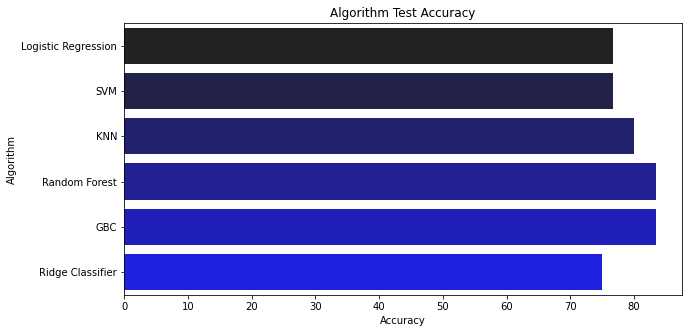

In [22]:
#Testing Accuracy
f,ax = plt.subplots(figsize = (10,5))
sns.barplot(x=accuracy_list,y=algorithm,palette = sns.dark_palette("blue",len(accuracy_list)))
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
plt.title('Algorithm Test Accuracy')
plt.show()

<a id="10"></a>
# Discussion
- Using the KBest approach with $Chi^{2}$ score can be an effective approach for feature selection.
- However, other methods for this data set in feature selection should be suggested such as a correlation matrix or tree importance based selection method
- Training accuracy does not mean the model will predict as well and models with lower training accuracy can predict better
- Lastly, tree ensembles may be a better selection for this type of data set with the given features used.
- If this notebook is helpful please provide an upvote!
- Feed back is also really nice!